### Imports

In [1]:
from math import pi

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from torch.utils.data import DataLoader

import src.simclr as simclr
from src.data_loading import get_data_loader
from src.utils import accuracy

### Params

In [2]:
dim = 6
n_layers = 4
n_epochs = 100
n_points = 10
b_size = 5
min_t, max_t = (0.0, pi / 2.0)

### Generate data

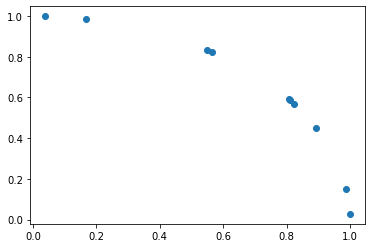

In [3]:
thetas = np.random.rand(n_points) * (max_t - min_t) + min_t
x = np.cos(thetas)
y = np.sin(thetas)
plt.scatter(x, y)

In [4]:
def to_dataset(x, y):
    d = np.concatenate([x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)
    d = torch.from_numpy(d).float()
    return data.TensorDataset(d)


def block(d, num):
    unit = nn.Sequential(nn.Linear(d, d), nn.GELU())
    from copy import deepcopy

    return nn.Sequential(
        *[deepcopy(unit) for _ in range(num)], nn.Linear(d, 2)
    )


def plot_vec(tensor):
    if tensor.size(0) % 5 != 0:
        print("pass plotting step, not // 5")
        return
    if tensor.size(1) != 2 or tensor.dim() > 2:
        print(tensor.dim())
        print("pass plotting step, not batch + 2d data")
        return
    plt.figure()
    n = tensor.size(0) // 5
    print(
        "Input data distribution, blue = original data points, other colors = transformed data points"
    )
    for ix in range(3):
        ndarray = tensor[ix * n : (ix + 1) * n, :].detach().numpy()
        x = [arr[0] for arr in ndarray]
        y = [arr[1] for arr in ndarray]
        plt.scatter(x, y)
    plt.show()
    plt.close()
    print("Constrastive representation")
    for ix in range(3, 4):
        ndarray = tensor[ix * n : (ix + 1) * n, :].detach().numpy()
        x = [arr[0] for arr in ndarray]
        y = [arr[1] for arr in ndarray]
        plt.scatter(x, y)
    plt.show()
    plt.close()


def train_simclr(
    data: DataLoader,
    model: nn.Module,
    lr: float,
    decay: float,
    n_epochs: int = 100,
    plot_every: int = 10,
    print_every: int = 10,
):
    optimizer = torch.optim.AdamW(
        model.parameters(), lr=lr, weight_decay=decay
    )
    transform = lambda tensor: tensor + torch.randn_like(x) * 0.1
    for e_ix in range(n_epochs):
        for (step_ix, batch) in enumerate(data):
            x = batch[0]
            transformed, loss, logits_labels = simclr.step(x, model, transform)
            logits, labels = logits_labels
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if plot_every and ((e_ix == 1) or (e_ix + 1) % plot_every == 0):
            plot_vec(torch.cat([x, transformed]))
        if print_every and (e_ix + 1) % print_every == 0:
            print(f"loss: {loss.item()}")
            print(f"contrastive accuracy: {accuracy(logits, labels)}")

In [5]:
dataset = to_dataset(x, y)
len(dataset)

10

In [6]:
train_loader, _ = get_data_loader(
    dataset, val_share=0.0, batch_size=b_size, single_batch=False
)

Dataset lengths: train-10, val-0


In [7]:
encoder = nn.Sequential(nn.Linear(2, dim),)
head = block(dim, num=3)
model = simclr.ContrastiveLearner(encoder=encoder, projection=head)

loss: 2.197188138961792
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604645
Input data distribution, blue = original data points, other colors = transformed data points


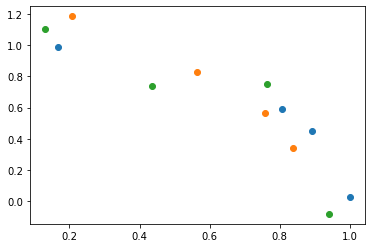

Constrastive representation


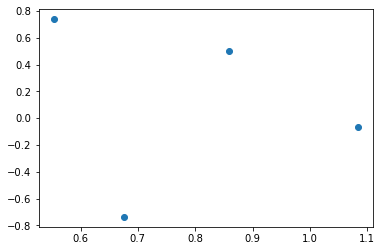

loss: 2.197136402130127
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.8999999761581421
loss: 2.197101593017578
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.800000011920929
loss: 2.1971468925476074
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 2.1970133781433105
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.8999999761581421
loss: 2.196974277496338
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.30000001192092896
loss: 2.196779727935791
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.699999988079071
loss: 2.1967873573303223
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 2.196533679962158
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 2.196833848953247
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604645
loss: 2.195446491241455
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.

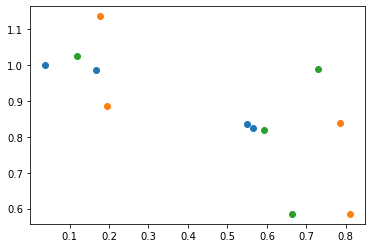

Constrastive representation


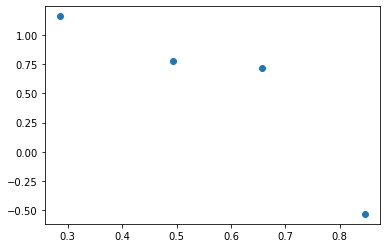

loss: 2.192399024963379
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604645
loss: 2.191582441329956
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.20000000298023224
loss: 2.1857340335845947
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604645
loss: 2.173767566680908
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 2.1807026863098145
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 2.176950454711914
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 2.139477491378784
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.800000011920929
loss: 2.158628225326538
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604645
loss: 2.1283986568450928
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 2.1584107875823975
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604

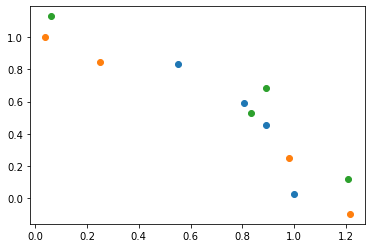

Constrastive representation


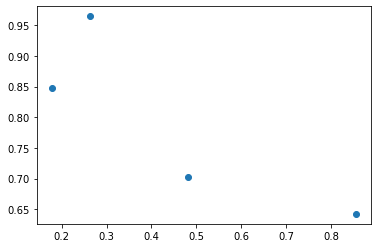

loss: 1.6479425430297852
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 1.6179497241973877
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 1.7234834432601929
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 1.5754454135894775
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 1.872375726699829
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604645
loss: 1.7369520664215088
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.800000011920929
loss: 1.5666896104812622
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.8999999761581421
loss: 1.58319091796875
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 1.5688587427139282
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 1.5652201175689697
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.60000002384

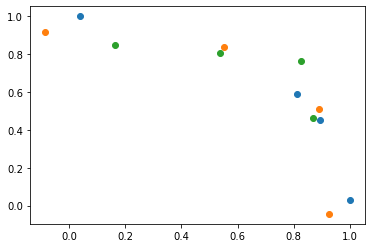

Constrastive representation


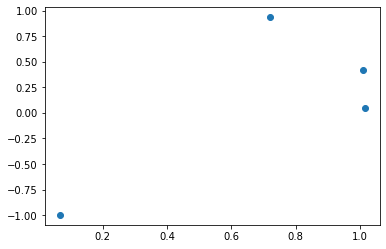

loss: 1.564554214477539
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.699999988079071
loss: 1.562103509902954
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.800000011920929
loss: 1.7398418188095093
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.30000001192092896
loss: 1.5668751001358032
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604645
loss: 1.6033843755722046
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 2.2657310962677
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.4000000059604645
loss: 1.8762565851211548
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.0
loss: 1.5627061128616333
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.8999999761581421
loss: 1.6100327968597412
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.699999988079071
loss: 1.5917160511016846
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0

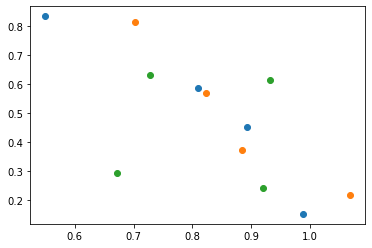

Constrastive representation


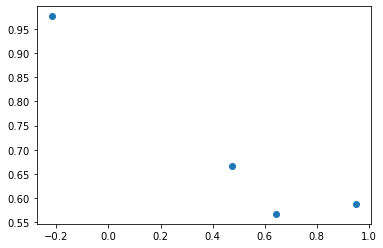

loss: 1.8080484867095947
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 1.7426484823226929
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 1.7926076650619507
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 1.7814557552337646
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 1.570059061050415
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.8999999761581421
loss: 1.7526966333389282
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.699999988079071
loss: 1.758715271949768
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 1.6241369247436523
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 1.9852253198623657
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.6000000238418579
loss: 1.6656789779663086
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 0.5
loss: 1.571066737174987

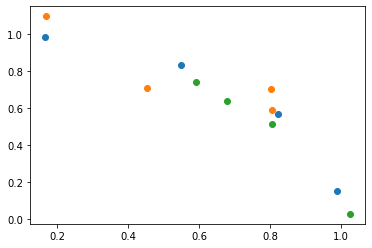

Constrastive representation


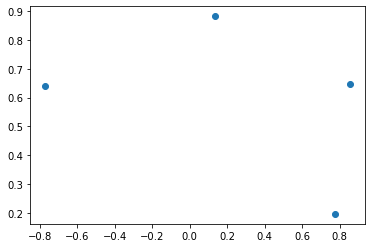

loss: 1.5449895858764648
acc torch.Size([10]) torch.Size([10])
contrastive accuracy: 1.0


In [8]:
train_simclr(
    train_loader,
    model,
    n_epochs=n_epochs,
    plot_every=n_epochs // 5,
    print_every=1,
    lr=1e-3,
    decay=1e-5,
)